Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Loading data and preprocess it

In [2]:
# Load the dataset
data = pd.read_csv('data.csv')

# Check the first few rows
print(data.head())

print(data.isnull().sum())

# Check data types
print(data.dtypes)


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
Region                                      28
 Date                             

Removing blank space

In [7]:
data.columns = data.columns.str.strip()

print(data.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


Converting date in datetime format

In [8]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Drop or fill missing values (if any)
data.dropna(inplace=True)


C:\Users\Bhavesh Gupta\AppData\Local\Temp\ipykernel_21372\2223054948.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


Visualization of data

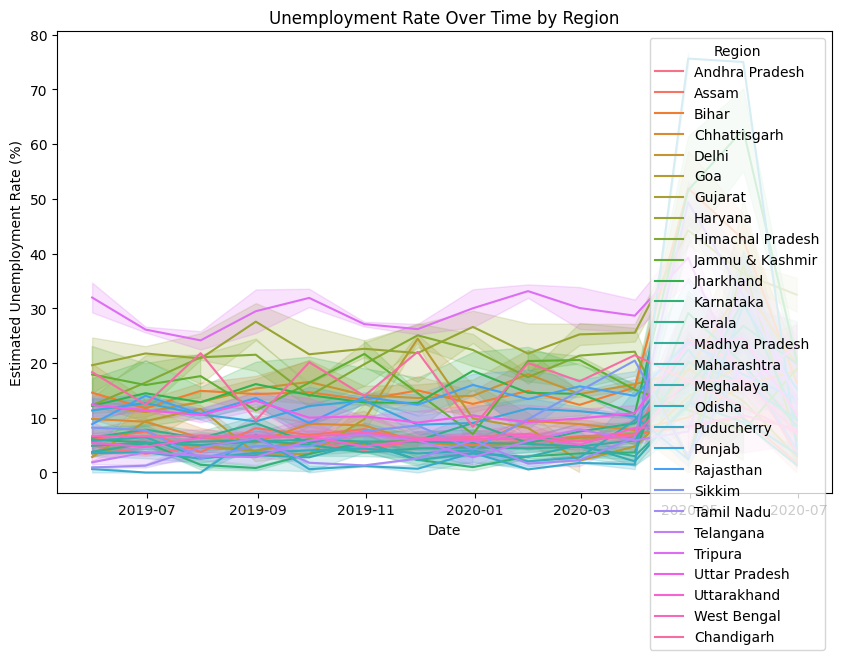

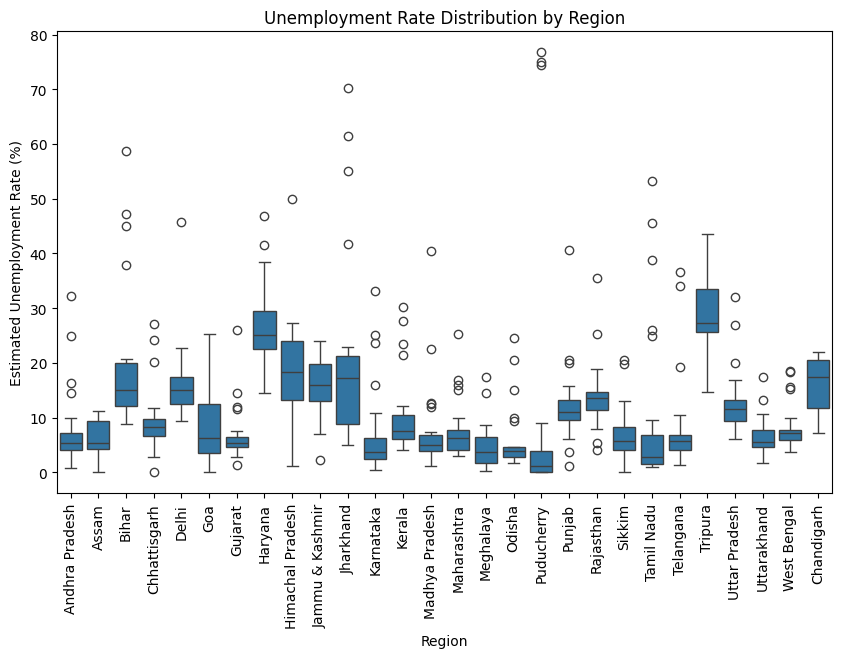

In [9]:
# Unemployment rate trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate Over Time by Region')
plt.show()

# Boxplot to compare unemployment rate by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=data)
plt.title('Unemployment Rate Distribution by Region')
plt.xticks(rotation=90)
plt.show()


Correlation matrix

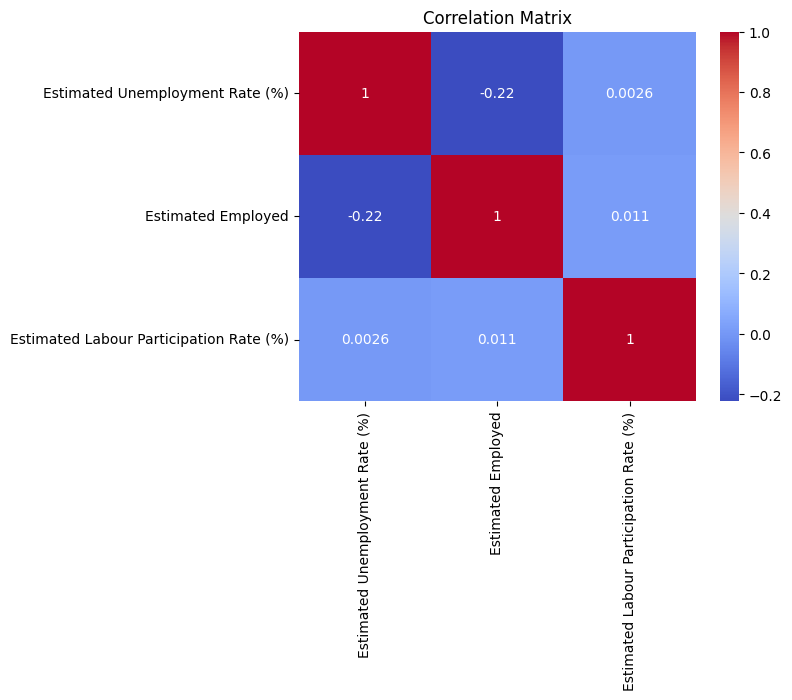

In [10]:

corr_matrix = data[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Model using sklearn algorithm

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Convert 'Frequency' column to categorical (dummy variables)
data = pd.get_dummies(data, columns=['Frequency'], drop_first=True)

# Convert other numeric columns to floats, handling any non-numeric values
data['Estimated Unemployment Rate (%)'] = pd.to_numeric(data['Estimated Unemployment Rate (%)'], errors='coerce')
data['Estimated Employed'] = pd.to_numeric(data['Estimated Employed'], errors='coerce')
data['Estimated Labour Participation Rate (%)'] = pd.to_numeric(data['Estimated Labour Participation Rate (%)'], errors='coerce')

# Check for and handle missing values
data.dropna(inplace=True)

# Now proceed with your analysis


# Feature selection: drop Region, Date, and Area
X = data.drop(['Region', 'Date', 'Area', 'Estimated Unemployment Rate (%)'], axis=1)
y = data['Estimated Unemployment Rate (%)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')


Mean Absolute Error: 8.31547468840568
R-squared: 0.04669454883866697
